<a href="https://colab.research.google.com/github/VikriAulia/Tensorflow-Deep-Learning-Speech-Recognition/blob/master/SpeechEmotionMLPCClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa

In [0]:
!pip install soundfile

In [0]:
import soundfile

In [0]:
import os, glob, pickle

In [0]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q /content/drive/My\ Drive/Dataset/Speech/SpeechEmotion/SpeechEmotion.zip -d RawData 

In [0]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [0]:
#check sound dim
def check_sound_dim(file_name):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    result = librosa.util.valid_audio(y=X, mono=True)
  return result

In [0]:
#looping each file
for file in glob.glob("/content/RawData/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)
        try:
          result = check_sound_dim(file)
        except:
          print('Error at file: {}'.format(file_name))
          os.remove(file)
          print('File {} Removed'.format(file_name))


# Original source File error with invalid dim
Error at file: 03-01-08-01-02-02-01.wav<br>
Error at file: 03-01-02-01-01-02-01.wav<br>
Error at file: 03-01-02-01-02-02-05.wav<br>
Error at file: 03-01-06-01-01-02-20.wav<br>
Error at file: 03-01-03-01-02-01-20.wav<br>

In [0]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [0]:
emotions['02']

'calm'

In [0]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/RawData/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [0]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

In [0]:
print((x_train.shape[0], x_test.shape[0]))

(611, 153)


In [0]:
print(y_train[1])

fearful


In [0]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [0]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=800)

In [0]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=800, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_pred=model.predict(x_test)

In [0]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.16%


#Normalize data

In [0]:
x_train[0]

array([-5.49985529e+02,  5.44094633e+01, -1.20822934e+01, -1.23225632e+00,
       -1.13698031e+01,  8.14747688e+00, -1.31380177e+01, -7.93106247e+00,
       -1.08288295e+01, -1.10065392e+01, -1.04829713e+01,  1.02083939e-01,
       -4.79857994e+00, -9.18205646e+00, -9.53599718e+00, -5.83952553e-01,
       -8.73724378e+00, -2.32811106e+00, -9.60280822e+00, -6.67027613e+00,
       -3.77128007e+00, -3.67093165e+00, -1.95300141e+00,  1.68917486e+00,
       -5.39678510e-01,  2.67706595e+00, -2.51999891e+00, -4.03432391e-01,
        5.24282412e-01,  2.29072513e+00,  2.83255115e-01,  3.68760570e+00,
        2.84559536e+00,  8.03630403e-01, -9.49772996e-01,  1.53564308e+00,
        1.00149204e+00,  1.40731855e+00, -8.10609027e-01, -7.75224985e-01,
        6.44527765e-01,  6.44499765e-01,  6.38846139e-01,  5.93764273e-01,
        6.49232281e-01,  7.14461158e-01,  7.50121296e-01,  7.04550031e-01,
        6.64580243e-01,  6.57390416e-01,  6.28182094e-01,  6.40989847e-01,
        8.42135115e-06,  

In [0]:
x_train_nor = tf.keras.utils.normalize(x_train, axis=1)
x_test_nor = tf.keras.utils.normalize(x_test, axis=1)

In [0]:
x_train_nor[0]

array([-9.92811366e-01,  9.82177362e-02, -2.18104615e-02, -2.22441867e-03,
       -2.05243032e-02,  1.47074918e-02, -2.37162119e-02, -1.43168293e-02,
       -1.95477598e-02, -1.98685540e-02, -1.89234308e-02,  1.84277748e-04,
       -8.66220009e-03, -1.65750725e-02, -1.72139918e-02, -1.05412725e-03,
       -1.57721149e-02, -4.20261079e-03, -1.73345963e-02, -1.20409094e-02,
       -6.80776042e-03, -6.62661555e-03, -3.52547821e-03,  3.04922932e-03,
       -9.74205556e-04,  4.83252988e-03, -4.54899889e-03, -7.28259639e-04,
        9.46413151e-04,  4.13512325e-03,  5.11320540e-04,  6.65671488e-03,
        5.13675228e-03,  1.45068071e-03, -1.71449134e-03,  2.77208003e-03,
        1.80785244e-03,  2.54043385e-03, -1.46327824e-03, -1.39940441e-03,
        1.16347514e-03,  1.16342460e-03,  1.15321890e-03,  1.07183896e-03,
        1.17196754e-03,  1.28971604e-03,  1.35408826e-03,  1.27182488e-03,
        1.19967305e-03,  1.18669427e-03,  1.13396860e-03,  1.15708863e-03,
        1.52018784e-08,  

##Changing dimension for new Model

In [0]:
x_train.shape

(382, 180)

In [0]:
x_train =np.expand_dims(x_train_nor, axis=2)
x_test= np.expand_dims(x_test_nor, axis=2)

In [0]:
type(x_train[1])

numpy.ndarray

#changing label to numpy

In [0]:
y_train_new = np.array(y_train)
y_test_new = np.array(y_test)

In [0]:
type(y_train_new[1])

numpy.str_

#Changing label to categorical dtype


In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train_new))
y_test = np_utils.to_categorical(lb.fit_transform(y_test_new))



Using TensorFlow backend.


In [0]:
y_test[2]

array([1., 0., 0., 0.], dtype=float32)

# Model 2 CNN

In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu',input_shape=(180, 1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPool1D(pool_size=8, padding='same'),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 180, 128)          768       
_________________________________________________________________
dropout (Dropout)            (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 23, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 128)           0

In [0]:
history = model2.fit(x_train,y_train, batch_size=16, epochs=1000, validation_data=(x_test, y_test))

Train on 611 samples, validate on 153 samples
Epoch 1/1000
611/611 [==============================] - 0s 370us/sample - loss: 1.3292 - acc: 0.3241 - val_loss: 1.3322 - val_acc: 0.3007
Epoch 2/1000
611/611 [==============================] - 0s 345us/sample - loss: 1.3277 - acc: 0.3257 - val_loss: 1.3237 - val_acc: 0.2876
Epoch 3/1000
611/611 [==============================] - 0s 331us/sample - loss: 1.3334 - acc: 0.3273 - val_loss: 1.3224 - val_acc: 0.2810
Epoch 4/1000
611/611 [==============================] - 0s 319us/sample - loss: 1.3291 - acc: 0.3421 - val_loss: 1.3199 - val_acc: 0.2941
Epoch 5/1000
611/611 [==============================] - 0s 362us/sample - loss: 1.3260 - acc: 0.3421 - val_loss: 1.3180 - val_acc: 0.3007
Epoch 6/1000
611/611 [==============================] - 0s 355us/sample - loss: 1.3266 - acc: 0.3191 - val_loss: 1.3201 - val_acc: 0.2745
Epoch 7/1000
611/611 [==============================] - 0s 349us/sample - loss: 1.3281 - acc: 0.3159 - val_loss: 1.3177 - val_

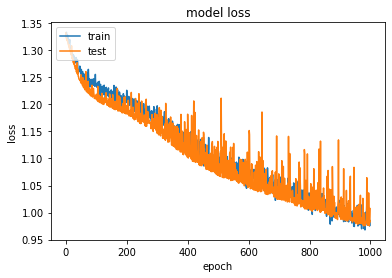

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Saving the Model

In [0]:
model_name = 'Emotion_Voice_Detection_CNN_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_CNN_Model.h5 


In [0]:
#write model JSON
import json
model_json = model2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

#Load Saved Model

In [0]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/saved_models/Emotion_Voice_Detection_CNN_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', 
                     optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6), 
                     metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

ValueError: ignored